In [2]:
options(scipen = 999, repr.plot.width=4, repr.plot.height= 4, warn = -1)

In [5]:

install.packages('R.matlab', repos = "https://cran.r-project.org/")
library(R.matlab)

package 'R.matlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpkX0J8v\downloaded_packages


R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen



In [35]:
location <- "C:/Users/Administrator/Desktop/ex3data1.mat"

df <- as.data.frame(readMat(location))

X <- df[,1:400]
y <- df[, 401]


input_layer_size  <- 400
num_labels <- 10

m <- nrow(X)
rand_indices <- sample(m, 100);
sel <- X[rand_indices, ]

In [36]:
#Funcion 
displayData  <- function(X, example_width = round(sqrt(dim(X)[2])))  {
  #DISPLAYDATA Display 2D data in a nice grid
  #   [h, display_array] <- DISPLAYDATA(X, example_width) displays 2D data
  #   stored in X in a nice grid. It returns the figure handle h and the
  #   displayed array if requested.
  
  if (is.vector(X))
    X <- t(X)
  
  # Compute rows, cols
  m <- dim(X)[1]
  n <- dim(X)[2]
  
  example_height <- (n / example_width) #20
  
  # Compute number of items to display
  display_rows <- floor(sqrt(m)) #10
  display_cols <- ceiling(m / display_rows) #10
  
  # Between images padding
  pad <- 1
  
  # Setup blank display
  display_array <- -matrix(0,pad + display_rows * (example_height + pad), pad + display_cols * (example_width + pad))
  
  # Copy each example into a patch on the display array
  curr_ex <- 1
  
  
  for (j in 1:display_rows) {
    for (i in 1:display_cols) {
      if (curr_ex > m)
        break
      # Copy the patch
      
      # Get the max value of the patch
      max_val <- max(abs(X[curr_ex,]))
      display_array[pad + (j - 1) * (example_height + pad) + (1:example_height), pad + (i - 1) * (example_width + pad) + 
                    (1:example_width)] <- matrix(unlist(X[curr_ex,]), example_height, example_width) / max_val
      curr_ex <- curr_ex + 1
    }
    if (curr_ex > m)
      break
  }
  
  # Display Image
  op <- par(bg = "gray")
  
  #image draws by row from bottom up, but R indexes matrices by column, top down
  dispArr <- t(apply(display_array,2,rev))
  
  image(
    z = dispArr,col = gray.colors(100), xaxt = 'n',yaxt = 'n'
  )
  
  grid(
    nx = display_cols,display_rows,col = 'black',lwd = 2,lty = 1
  )
  box()
  par(op)
  
  
}

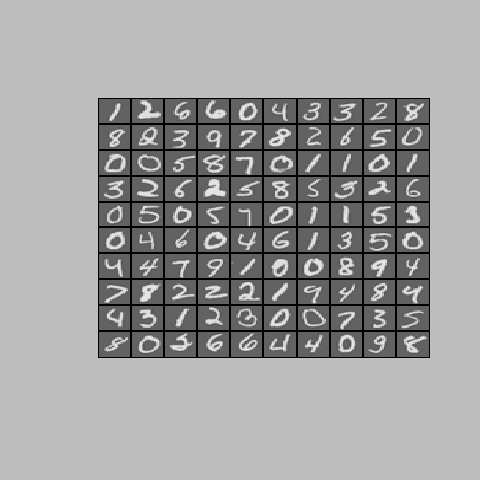

In [37]:
displayData(sel)